# 2019/01/25    - test campaign 1, day 9
##    3.9 Optimize M1-M3-M1 figure with extra quad forces and CGH in-out compensation (14 iterations, some M1 only)

In [1]:
from M1M3tools import *
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import glob
import pandas as pd

%matplotlib inline
plt.jet()

dateID = 190125
testID = '3-9' 

<Figure size 432x288 with 0 Axes>

### We did 2 rounds of optimizations: bend0 - bend5, then bend6-13. Each round took about 1/2 day.
The logic was that for each round we do 2 or 3 M1M3 global optimizations. After that, becaues M1 is more sensitive to low order bending, we do a few rounds of M1 only optimization, with only low order bending modes (astigmatisms), hoping this would improve M1 without degrading M3. At the end, we do another M1-M3-M1 measurement to confirm the final surface.

3-9 bend0 ------ irow = 0, icol = 0, -----------------------------
/Processed/190125_3-9 and CGH/M1 set0 190125 3-9.h5: date not in h5 file. 
/Processed/190125_3-9 and CGH/M3 set0 190125 3-9.h5: date not in h5 file. 
3-9 bend1 ------ irow = 0, icol = 1, -----------------------------
/Processed/190125_3-9 and CGH/M1 set1 190125 3-9.h5: date not in h5 file. 
/Processed/190125_3-9 and CGH/M3 set1 190125 3-9.h5: date not in h5 file. 
3-9 bend2 ------ irow = 0, icol = 2, -----------------------------
/Processed/190125_3-9 and CGH/M1 set2 190125 3-9.h5: date not in h5 file. 
3-9 bend3 ------ irow = 1, icol = 0, -----------------------------
/Processed/190125_3-9 and CGH/M1 set3 190125 3-9.h5: date not in h5 file. 
3-9 bend4 ------ irow = 1, icol = 1, -----------------------------
/Processed/190125_3-9 and CGH/M1 set4 190125 3-9.h5: date not in h5 file. 
3-9 bend5 ------ irow = 1, icol = 2, -----------------------------
/Processed/190125_3-9 and CGH/M1 set5 190125 3-9.h5: date not in h5 file.

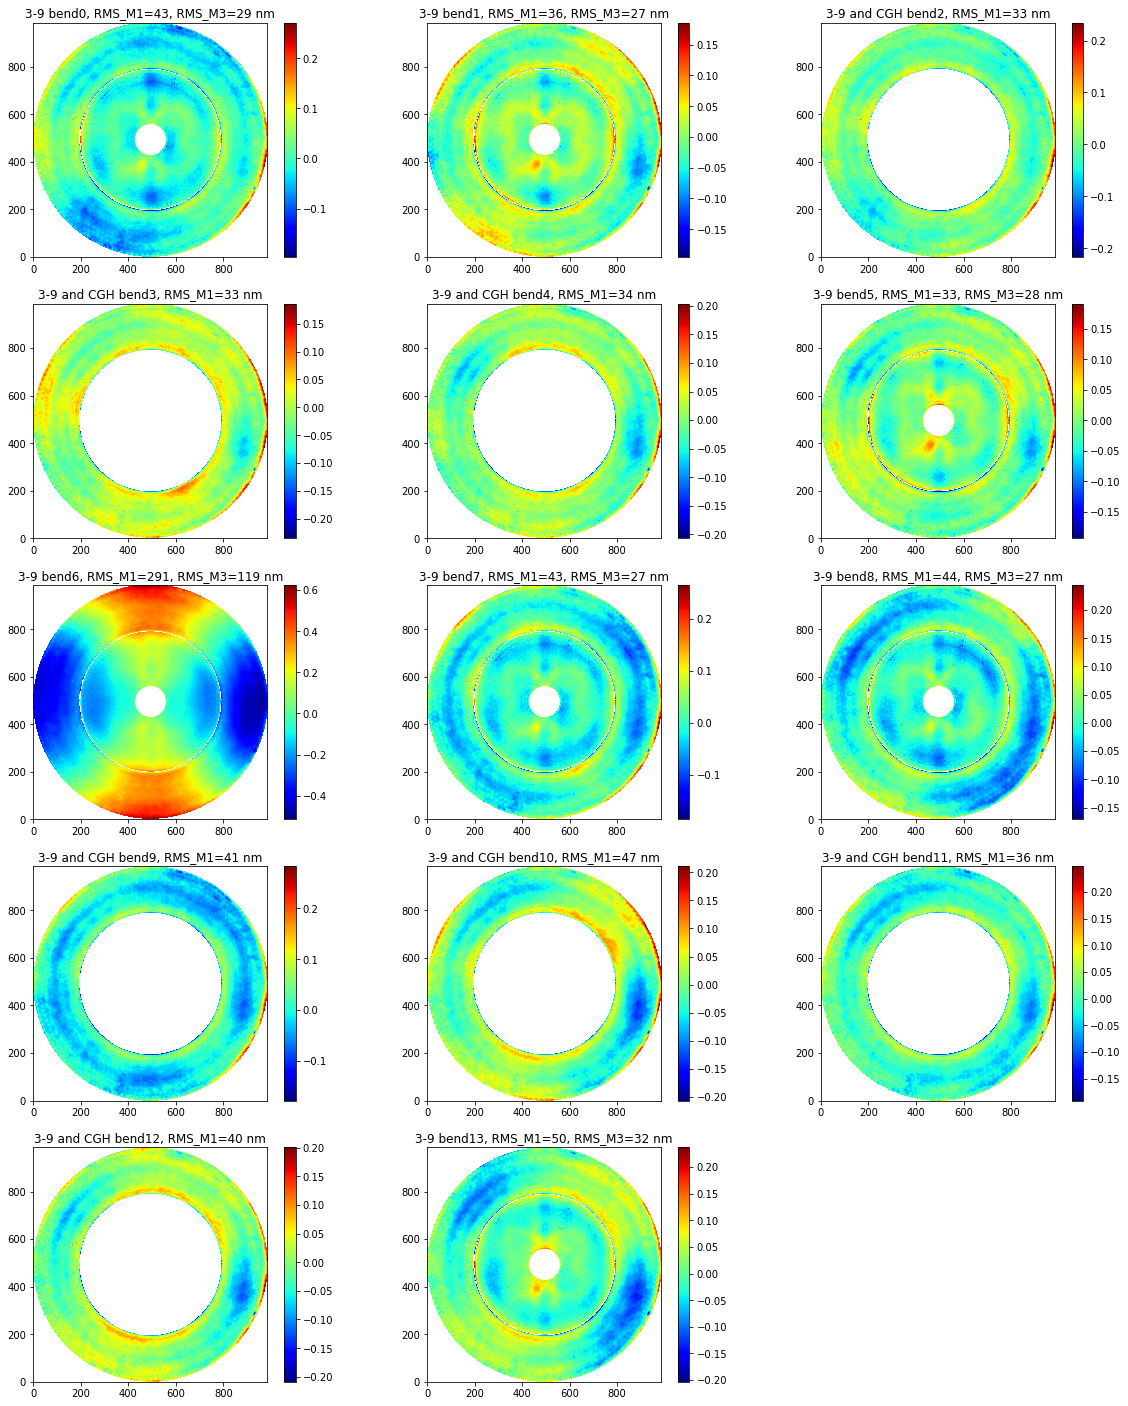

In [2]:
testID = '3-9'
iter = ' and CGH'
fig, ax = plt.subplots(5,3,figsize=(20,5*5))
i = 0
for bend in range(14):
    irow = np.int8(i/3)
    icol = np.mod(i,3)
    i += 1
    print('%s bend%s ------ irow = %d, icol = %d, -----------------------------'%(testID, bend, irow, icol))

    fileset = sorted(glob.glob('%s/Processed/%d_%s%s/M1 set%d %s %s.h5'%(
        dataDir, dateID, testID, iter, bend, dateID, testID)))
    m1s,centerRow1,centerCol1,pixelSize1 = readH5Map(fileset)

    fileset = sorted(glob.glob('%s/Processed/%d_%s%s/M3 set%d %s %s.h5'%(
        dataDir, dateID, testID, iter, bend, dateID, testID)))
    if len(fileset) == 0:
        pass
    else:
        m3s,centerRow3,centerCol3,pixelSize3 = readH5Map(fileset)
        
    m1rms = np.std(m1s[~np.isnan(m1s)])*1000 #convert into nm
    if len(fileset) == 0:
        img = ax[irow][icol].imshow(m1s, origin='lowerleft')
        ax[irow][icol].set_title('%s%s bend%d, RMS_M1=%.0f nm'%(testID,iter, bend, m1rms))
    else:
        [x1, y1] = mkXYGrid(m1s, centerRow1, centerCol1, pixelSize1)
        [x3, y3] = mkXYGrid(m3s, centerRow3, centerCol3, pixelSize3)
        s = mkM1M3disp(m1s, m3s, x1, y1, x3, y3)
        m3rms = np.std(m3s[~np.isnan(m3s)])*1000 #convert into nm
        img = ax[irow][icol].imshow(s, origin='lowerleft')  
        ax[irow][icol].set_title('%s bend%d, RMS_M1=%.0f, RMS_M3=%.0f nm'%(testID, bend, m1rms, m3rms))
    fig.colorbar(img, ax=ax[irow][icol])

fig.delaxes(ax.flatten()[-1])    

0 ['/Users/bxin/largeData/M1M3_ML/Processed/190125_3-9 and CGH/M1M3 set0 190125 3-9M1M3 fit mode amps.csv']
1 ['/Users/bxin/largeData/M1M3_ML/Processed/190125_3-9 and CGH/M1M3 set1 190125 3-9M1M3 fit mode amps.csv']
2 ['/Users/bxin/largeData/M1M3_ML/Processed/190125_3-9 and CGH/M1 set2 190125 3-9 -FC fit mode amps.csv']
3 ['/Users/bxin/largeData/M1M3_ML/Processed/190125_3-9 and CGH/M1 set3 190125 3-9 -FC fit mode amps.csv']
4 ['/Users/bxin/largeData/M1M3_ML/Processed/190125_3-9 and CGH/M1 set4 190125 3-9 -FC fit mode amps.csv']
5 ['/Users/bxin/largeData/M1M3_ML/Processed/190125_3-9 and CGH/M1M3 set5 190125 3-9M1M3 fit mode amps.csv']
6 ['/Users/bxin/largeData/M1M3_ML/Processed/190125_3-9 and CGH/M1M3 set6 190125 3-9M1M3 fit mode amps.csv']
7 ['/Users/bxin/largeData/M1M3_ML/Processed/190125_3-9 and CGH/M1M3 set7 190125 3-9M1M3 fit mode amps.csv']
8 ['/Users/bxin/largeData/M1M3_ML/Processed/190125_3-9 and CGH/M1M3 set8 190125 3-9M1M3 fit mode amps.csv']
9 ['/Users/bxin/largeData/M1M3_ML/

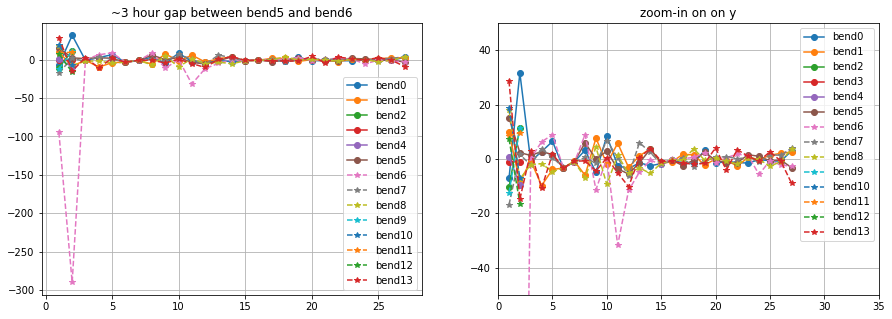

In [3]:
iter = ' and CGH'
fig, ax = plt.subplots(1,2, figsize=(15,5))
for bend in range(14):
    csvName = glob.glob('%s/Processed/%d_%s%s/M1*set%d %s %s*fit mode amps.csv'%(
            dataDir, dateID, testID, iter, bend, dateID, testID))
    print(bend, csvName)
    df = pd.read_csv(csvName[0], header=None)
    if bend<6:
        ax[0].plot(df[0], df[1], '-o', label='bend%d'%bend)
        ax[1].plot(df[0], df[1], '-o', label='bend%d'%bend)
    else:
        ax[0].plot(df[0], df[1], '--*', label='bend%d'%bend)
        ax[1].plot(df[0], df[1], '--*', label='bend%d'%bend)
leg = ax[0].legend()
leg = ax[1].legend()
ax[0].grid()
ax[0].set_title('~3 hour gap between bend5 and bend6')
ax[1].grid()
ax[1].set_title('zoom-in on on y')
aa = ax[1].set_ylim([-50, 50])
aa = ax[1].set_xlim([0, 35])

## Data below seem to be same as data above. Somehow Mirror Lab duplicated data in the delivered data package.

3-9 bend0 ------ irow = 0, icol = 0, -----------------------------
/Processed/190125_3-9 and CGH (test)/M1 set0 190125 3-9.h5: date not in h5 file. 
/Processed/190125_3-9 and CGH (test)/M3 set0 190125 3-9.h5: date not in h5 file. 
3-9 bend1 ------ irow = 0, icol = 1, -----------------------------
/Processed/190125_3-9 and CGH (test)/M1 set1 190125 3-9.h5: date not in h5 file. 
/Processed/190125_3-9 and CGH (test)/M3 set1 190125 3-9.h5: date not in h5 file. 
3-9 bend2 ------ irow = 0, icol = 2, -----------------------------
/Processed/190125_3-9 and CGH (test)/M1 set2 190125 3-9.h5: date not in h5 file. 
3-9 bend3 ------ irow = 1, icol = 0, -----------------------------
/Processed/190125_3-9 and CGH (test)/M1 set3 190125 3-9.h5: date not in h5 file. 
3-9 bend4 ------ irow = 1, icol = 1, -----------------------------
/Processed/190125_3-9 and CGH (test)/M1 set4 190125 3-9.h5: date not in h5 file. 
3-9 bend5 ------ irow = 1, icol = 2, -----------------------------
/Processed/190125_3-9 an

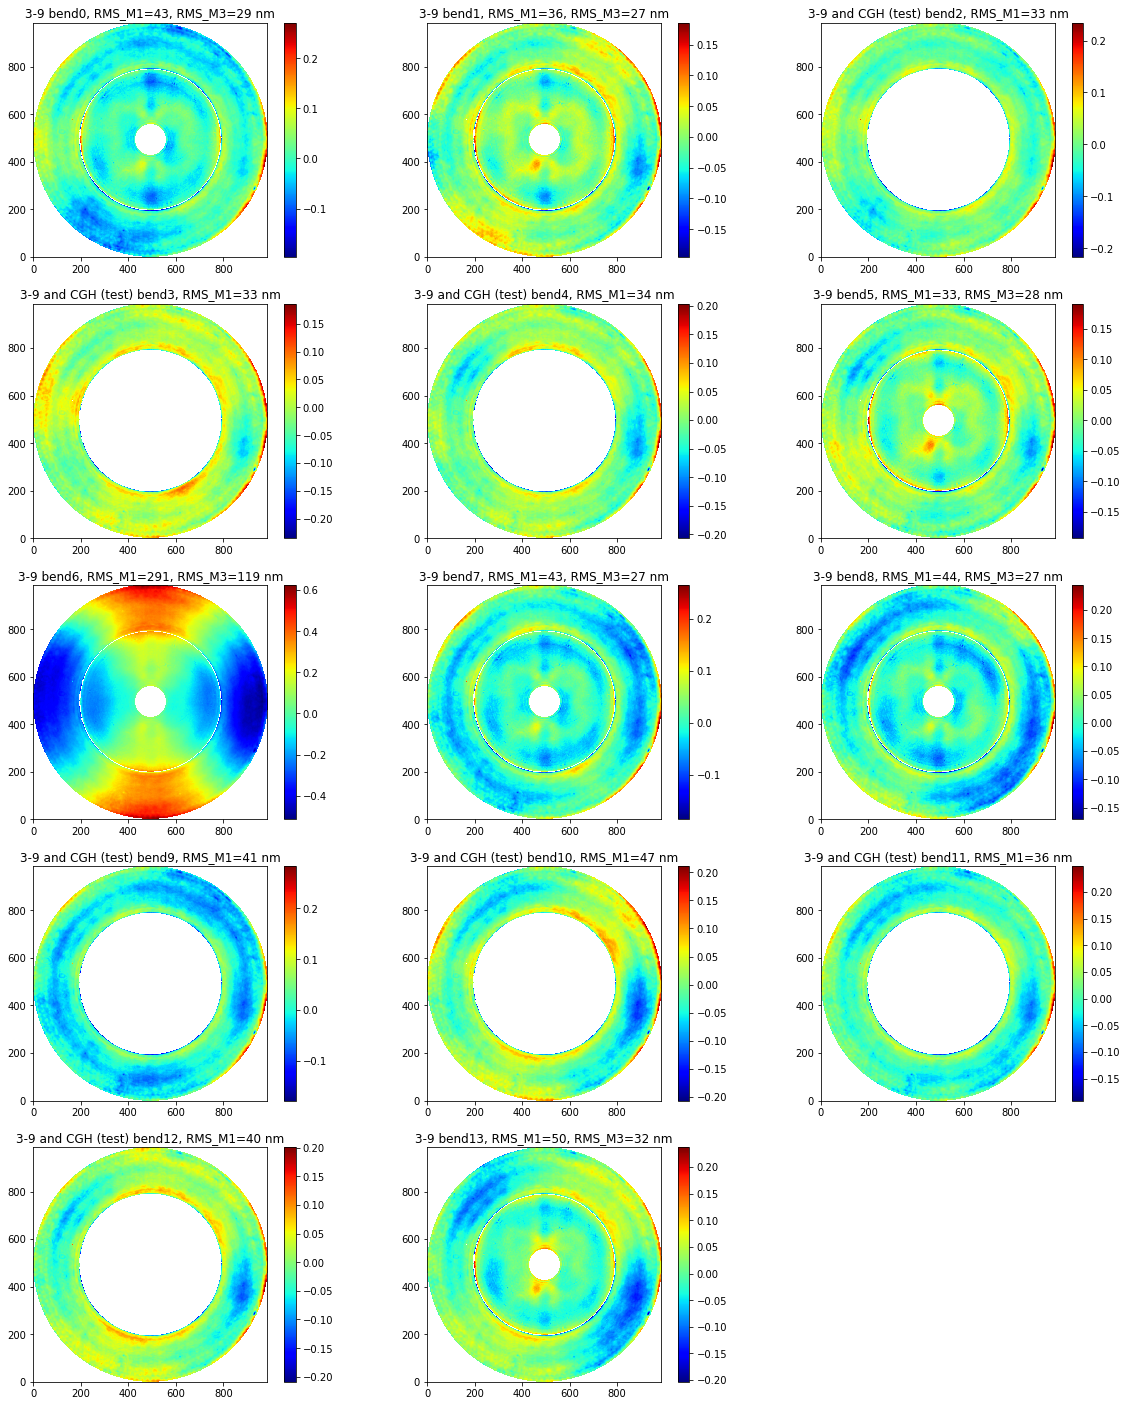

In [7]:
testID = '3-9'
iter = ' and CGH (test)'
fig, ax = plt.subplots(5,3,figsize=(20,5*5))
i = 0
for bend in range(14):
    irow = np.int8(i/3)
    icol = np.mod(i,3)
    i += 1
    print('%s bend%s ------ irow = %d, icol = %d, -----------------------------'%(testID, bend, irow, icol))

    fileset = sorted(glob.glob('%s/Processed/%d_%s%s/M1 set%d %s %s.h5'%(
        dataDir, dateID, testID, iter, bend, dateID, testID)))
    m1s,centerRow1,centerCol1,pixelSize1 = readH5Map(fileset)

    fileset = sorted(glob.glob('%s/Processed/%d_%s%s/M3 set%d %s %s.h5'%(
        dataDir, dateID, testID, iter, bend, dateID, testID)))
    if len(fileset) == 0:
        pass
    else:
        m3s,centerRow3,centerCol3,pixelSize3 = readH5Map(fileset)
                
    m1rms = np.std(m1s[~np.isnan(m1s)])*1000 #convert into nm
    if len(fileset) == 0:
        img = ax[irow][icol].imshow(m1s, origin='lowerleft')
        ax[irow][icol].set_title('%s%s bend%d, RMS_M1=%.0f nm'%(testID,iter, bend, m1rms))
    else:
        [x1, y1] = mkXYGrid(m1s, centerRow1, centerCol1, pixelSize1)
        [x3, y3] = mkXYGrid(m3s, centerRow3, centerCol3, pixelSize3)
        s = mkM1M3disp(m1s, m3s, x1, y1, x3, y3)
        m3rms = np.std(m3s[~np.isnan(m3s)])*1000 #convert into nm
        img = ax[irow][icol].imshow(s, origin='lowerleft')  
        ax[irow][icol].set_title('%s bend%d, RMS_M1=%.0f, RMS_M3=%.0f nm'%(testID, bend, m1rms, m3rms))
    fig.colorbar(img, ax=ax[irow][icol])

fig.delaxes(ax.flatten()[-1])  